# Importing data

In [1]:
import pandas as pd;

In [2]:
advertising = pd.read_csv("tvmarketing.csv");

In [3]:
# Display first 5 rows
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
# Display last 5 rows
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [5]:
# check the column
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
TV       200 non-null float64
Sales    200 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
# Shape of the DataFrame (row, column)
advertising.shape

(200, 2)

In [7]:
# statistical information about the DataFrame
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


# Visualing Data

In [8]:
import seaborn as sns
%matplotlib inline

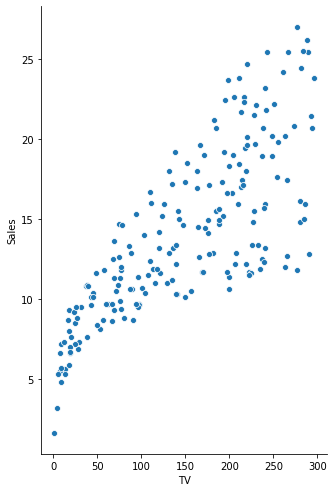

In [9]:
sns.pairplot(advertising, x_vars=('TV'), y_vars='Sales', height=7, aspect=0.7, kind='scatter')

# Performing SLR

Equation of linear regression
    y = c + m_1x_1 + m_2x_2+ ... + m_nx_n
y = c + mxTV


In [10]:
X = advertising['TV'];
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [11]:
y = advertising['Sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

# Training and Testing Sets


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [16]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [17]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [20]:
import numpy as np

X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


# Performing 

In [23]:
from sklearn.linear_model import LinearRegression
# create linear regression object
lr = LinearRegression()

# fit the model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Coefficient calculation

In [26]:
print(lr.intercept_)
print(lr.coef_)

6.989665857411679
[0.04649736]


y = 6.989 + 0.0464xTV

# Prediction

In [27]:
# Making prediction on the testing set
y_pred = lr.predict(X_test)

In [28]:
type(y_pred)

numpy.ndarray

# Computing RMSE and R^2 values

Text(0, 0.5, 'Sales')

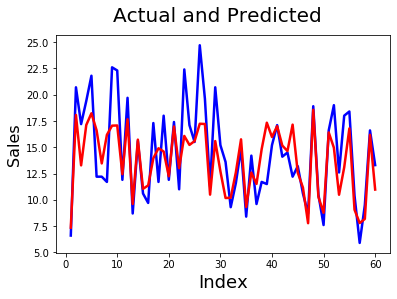

In [32]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1, 61, 1)]  # generating index
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20) # plot heading
plt.xlabel('Index', fontsize=18) # X-label
plt.ylabel('Sales', fontsize=16) # Y-label

Text(0, 0.5, 'y_test-y_pred')

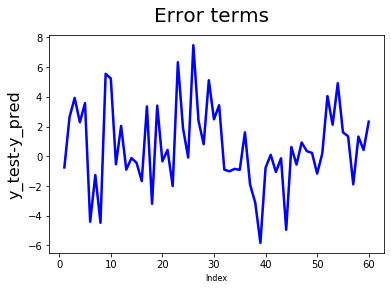

In [34]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c, y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error terms', fontsize=20)
plt.xlabel('Index', fontsize=8)
plt.ylabel('y_test-y_pred', fontsize=16)



In [36]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)


In [37]:
r_squared = r2_score(y_test, y_pred)

In [40]:
print('Mean_Squared_Error :', mse)
print('r_square_value :', r_squared)

Mean_Squared_Error : 7.97579853285485
r_square_value : 0.5942987267783302


Text(0, 0.5, 'Y-pred')

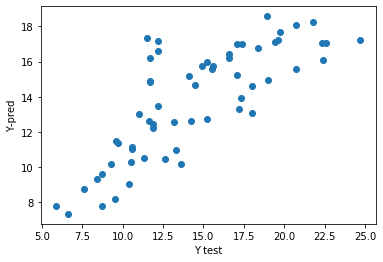

In [41]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Y test')
plt.ylabel('Y-pred')